In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import random
import scipy as sp

### Logistic Map

We considered $N$ logistic maps coupled as:

$x_i(t+1) = (1- \epsilon) f[x_i(t)] + \frac{\epsilon}{b_i} \sum_{j=1}^N \eta_{ij} f[(x_j (t-\tau_{ij})]$ 

$t$: discrete time index

$i$: discrete space index

$f(x) = ax(1-x)$: logistic map equation

$\eta_{ij}$: adjacency matrix

$b_i = \sum_j \eta_{ij}$

$\tau_{ij}$: delay time between the $i$th and $j$th

$\epsilon$: coupling strength

#### Network Connectivity

$\langle b \rangle = \frac{1}{N} \sum_{i=1}^N b_i$

In this case we measured the connectivity in terms of the average degree.

#### Synchronization indicators

$\sigma^2 = \frac{1}{N} \left \langle \sum_i (x_i - \langle x\rangle_s)^2 \right \rangle_t $

$\sigma '^2 = \frac{1}{N} \left \langle \sum_i (x_i - x_0)^2 \right \rangle_t $

In [239]:
class Logistic:
    def __init__(self, epsilon = 0.5, t_0 = int(0), T = int(100), a = 2.5, n_nodes = None,
                 av_degree = 8, tau_zero = int(1), type_of_graph = 1):
        '''
        PARAMETERS:
        epsilon: float
        t_0: float
        T:float
           Total time of simulated activity
        n_nodes: int
            Number of logistic maps
        av_degree: int
            Average degree of the graph
        x0: float
            Initial state of the logistic map
        tau_zero: int
            Delay parameter
        type_of_graph: int
            If 1, then the graph will follow the Barabasi-Albert
            model. If it's another number it will be Small-World.
        '''
        if n_nodes is None:
            raise ValueError("n_nodes must be specified")
        else:
            self.n_nodes = n_nodes
        self.epsilon = epsilon
        self.t_0 = t_0
        self.T = T
        self.av_degree = av_degree
        self.tau_zero = tau_zero
        self.type_of_graph = type_of_graph
        self.a = a
        
    def logistic(self, x):
        return x*self.a*(1-x)
    
    def generate_graph(self):
        if self.type_of_graph == 1:
            m = int(self.av_degree/2) 
            self.G = nx.barabasi_albert_graph(self.n_nodes,m) 
        else: 
            k = int(self.av_degree/2)
            p = 1 #probability of rewiring
            self.G = nx.watts_strogatz_graph(self.n_nodes, k, p, seed=None)
        return self.G
    
    def adjacency_matrix(self):
        self.M = nx.to_numpy_array(self.generate_graph())
        return self.M
    
    def calculate_b(self,index):
        return np.sum(self.M[index])
    
    def Tau_matrix(self):
        self.tau_matrix = []
        c = 2
        for i in range(0,self.n_nodes):
            tau = []
            for j in range(0,self.n_nodes):
                tau.append(int(self.tau_zero + c*np.random.uniform(0,1)))
            self.tau_matrix.append(tau)
        return self.tau_matrix
    
    def interation(self):
        self.M = self.adjacency_matrix()
        self.tau_matrix = self.Tau_matrix()
        self.mapas = {}
        tau_max = max(max(self.tau_matrix))
        for i in range(0,self.n_nodes):
            self.mapas[i] = [(np.random.uniform(0,1))] #Definindo os valores iniciais dos mapas    
        for t in range(1,self.T): #Percorre nos intervalos de tempo
            if t>=tau_max:
                for i in range(0,self.n_nodes): #Percorre em todos os nós
                    x_T = (1-self.epsilon)*self.logistic(self.mapas[i][t-1])
                    soma = []
                    for j in range(0,self.n_nodes): #Calcula o somatorio pra cada um dos nós
                        tau = self.tau_matrix[i][j]
                        soma.append((self.epsilon/self.calculate_b(i))*self.M[i][j]*
                                    self.logistic(self.mapas[j][t-tau])) 
                    x_T = x_T + np.sum(soma)
                    self.mapas[i].append(x_T)
            else: 
                for i in range(0,self.n_nodes): #Percorre em todos os nós
                    x_T = self.logistic(self.mapas[i][t-1])
                    soma = []
                    for j in range(0,self.n_nodes): #Calcula o somatorio pra cada um dos nós
                        tau = self.tau_matrix[i][j]
                        soma.append(0) 
                    x_T = x_T + np.sum(soma)
                    self.mapas[i].append(x_T)
        return self.mapas
        
    def run(self):
        return self.interation()
    
    def Sigma(self):
        space_mean = []
        for i in range(self.n_nodes): #Calculando a media espacial 
            space_mean.append(self.mapas[i][self.T-1])
        space_mean = np.mean(space_mean)
        sigma = []
        for i in range(n_nodes): #Somatorio 
            k = (self.mapas[i][self.T-1]-space_mean)**2
            sigma.append(k)
        sigma = sum(sigma)
        return (1/self.n_nodes)*(sigma/self.T) #Retorna a média temporal do somatorio divido por n_nodes
    
    def Sigma_line(self):
        sigma_line = []
        for i in range(n_nodes):
            k = (self.mapas[i][self.T-1]- self.mapas[i][0])**2
            sigma_line.append(k)
        sigma_line = sum(sigma_line)
        return (1/self.n_nodes)*(sigma_line/self.T)
    def Medias(self):
        finais = []
        for j in range(len(mapas)):
            finais.append((self.mapas[j][self.T-1]-self.mapas[j][0])**2)
        return np.mean(finais)/self.T
    def Teste(self):
        me = []
        for i in range(self.n_nodes):
            me.append(np.mean(self.mapas[i]))
        # me = np.mean(me)
        finais = []
        for j in range(len(mapas)):
            finais.append(((mapas[j][self.T-1]-me[j])**2))
        return np.sum(finais)/self.n_nodes

In [268]:
T = 25
n_nodes = 200
log = Logistic(epsilon = 0.5, T = T, a = 4, n_nodes = n_nodes, av_degree = 20, tau_zero = 5, type_of_graph=1)
mapas = log.run()

In [269]:
print("Sigma:",log.Sigma())
print("Sigma':",log.Sigma_line())
print("Médias:", log.Medias())
print("Teste:", log.Teste())

Sigma: 0.0007052439429636611
Sigma': 0.006136265740995686
Médias: 0.006136265740995686
Teste: 0.021702805986158064


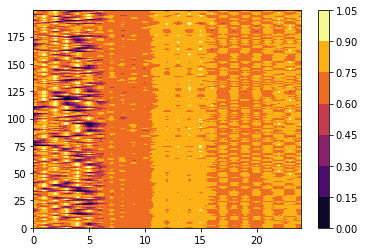

In [270]:
individuais = []
numeros=[]
for j in range(len(mapas)):
    individuais.append(mapas[j])
    numeros.append(j)
#plotar os estados finais
# plt.plot(finais)
CS = plt.contourf(individuais,vmin=0, vmax=1, cmap = "inferno")
cbar = plt.colorbar(CS)

In [271]:
finais = []
for j in range(len(mapas)):
    finais.append((mapas[j][T-1]-mapas[j][0])**2)
np.mean(finais)

0.15340664352489214

In [248]:
matrix_sigmas = []
matrix_sigmas_line = []
matrix_medias = []
matrix_testes = []
for i in range(20,2,-1):
    list_sigmas = []
    list_sigmas_line = []
    list_medias = []
    list_testes = []
    for j in range(0,100):
        T = 15
        n_nodes = 40
        log = Logistic(epsilon = 0.01*j, T = T, a = 4, n_nodes = n_nodes,
                       av_degree = i, tau_zero = 5, type_of_graph=1)
        mapas = log.run()
        list_sigmas.append(log.Sigma())
        list_sigmas_line.append(log.Sigma_line())
        list_medias.append(log.Medias())
        list_testes.append(log.Teste())
    matrix_sigmas.append(list_sigmas)
    matrix_sigmas_line.append(list_sigmas_line)
    matrix_medias.append(list_medias)
    matrix_testes.append(list_testes)

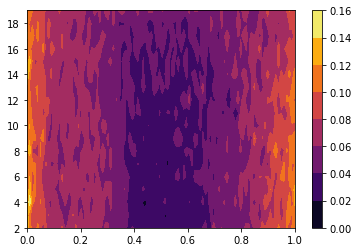

In [275]:
epsilon_values = np.linspace(0,1,100)
b_values = np.linspace(2,19,18)
CS = plt.contourf(epsilon_values,b_values,matrix_testes, cmap = "inferno") #O eixo y ta trocado, é pra ser de 20 ate 2 
                                                                           #e nao de 2 ate 20.
cbar = plt.colorbar(CS)
plt.show()

In [238]:
me = []
for i in range(n_nodes):
    me.append(np.mean(mapas[i]))
# me = np.mean(me)
finais = []
for j in range(len(mapas)):
    finais.append(((mapas[j][T-1]-me[j])**2))
np.sum(finais)/n_nodes

0.11547971007733979

In [290]:
T = 25
n_nodes = 200
log = Logistic(epsilon = 0.5, T = T, a = 4, n_nodes = n_nodes, av_degree = 5, tau_zero = 5, type_of_graph=1)
mapas = log.run()

space_av = []
for i in range(n_nodes):
    space_av.append(np.mean(mapas[i]))
time_av = []
for i in range(n_nodes):
    time_av.append(((mapas[i][T-1]-space_av[i])**2)/T)
cu = np.sum(time_av)/n_nodes
cu

0.0014111562400911835